# Lab3: Introduce to PyTorch

In [109]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

import seaborn as sns
import torch 
from torch import nn

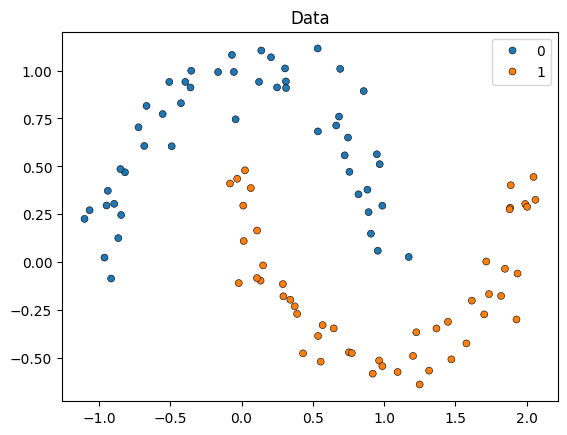

Epoch 0: loss=0.6884972453117371
Epoch 1: loss=0.6779313683509827
Epoch 2: loss=0.658855140209198
Epoch 3: loss=0.634864330291748
Epoch 4: loss=0.6099900007247925
Epoch 5: loss=0.5877389311790466
Epoch 6: loss=0.5701820850372314
Epoch 7: loss=0.5576789975166321
Epoch 8: loss=0.5496493577957153
Epoch 9: loss=0.5449639558792114
Epoch 10: loss=0.5424121618270874
Epoch 11: loss=0.5409060716629028
Epoch 12: loss=0.5395549535751343
Epoch 13: loss=0.5376683473587036
Epoch 14: loss=0.5347347855567932
Epoch 15: loss=0.530246913433075
Epoch 16: loss=0.5239488482475281
Epoch 17: loss=0.5163326263427734
Epoch 18: loss=0.5071264505386353
Epoch 19: loss=0.4966185390949249
Epoch 20: loss=0.48500701785087585
Epoch 21: loss=0.4733428955078125
Epoch 22: loss=0.4613270163536072
Epoch 23: loss=0.44916802644729614
Epoch 24: loss=0.4373447895050049
Epoch 25: loss=0.4254436194896698
Epoch 26: loss=0.4137425124645233
Epoch 27: loss=0.4031825661659241
Epoch 28: loss=0.3946322500705719
Epoch 29: loss=0.38697355

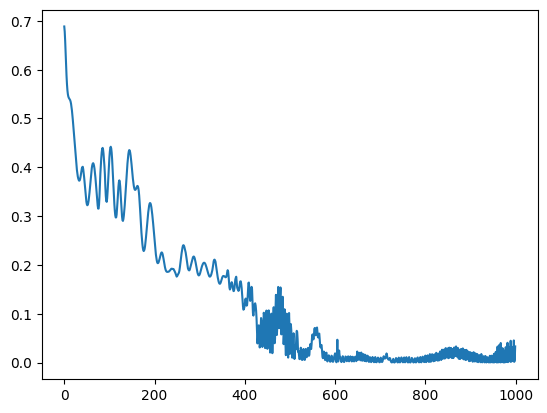

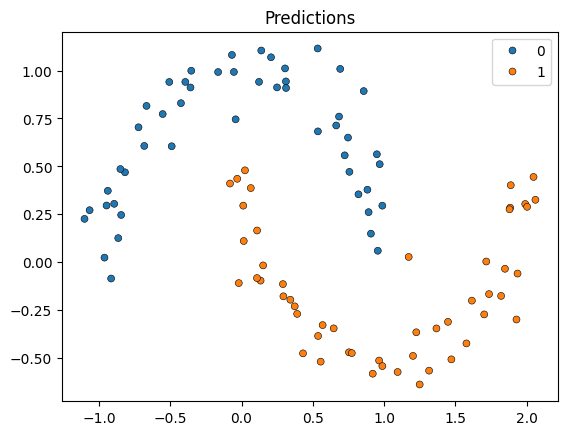

In [110]:
points, labels = make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=0)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=labels, marker="o", s=25, edgecolor="k", legend=True
).set_title("Data")
plt.show()

learning_rate = 0.01
n_epochs = 1000

X = torch.from_numpy(points).to(dtype=torch.float32)
y = torch.from_numpy(labels).to(dtype=torch.float32)

W1 = torch.randn((3, X.shape[1]))
b1 = torch.zeros((3, 1))

W2 = torch.randn((5, W1.shape[0]))
b2 = torch.zeros((5, 1))

W3 = torch.randn((1, W2.shape[0]))
b3 = torch.zeros((1, 1))

parameters = [W1, b1, W2, b2, W3, b3]

for p in parameters:
    p.requires_grad = True

loss = []

for i in range(n_epochs):
    a1 = (W1 @ X.T + b1).relu()
    a2 = (W2 @ a1 + b2).relu()
    a3 = (W3 @ a2 + b3).sigmoid()
    
    Y = a3.squeeze(0)

    L = torch.nn.functional.binary_cross_entropy(Y, y)
    loss.append(L.item())
    print(f'Epoch {i}: loss={L.item()}')
    L.backward()

    for p in parameters:
        p.data -= learning_rate * p.grad

plt.plot(loss)
plt.show()

predictions = Y.detach().numpy() 
predictions = (predictions > 0.5).astype(int)

sns.scatterplot(
    x=points[:, 0], y=points[:, 1], hue=predictions, marker="o", s=25, edgecolor="k", legend=True
).set_title("Predictions")
plt.show()


## Task 1

In [111]:
class MLP_Classifier(nn.Module):
    def __init__(self, hidden: int, x_size: int, sizes: list, layers: list):
        super().__init__()      
        sizes = [x_size] + sizes
        l = list()      
        for i in range(hidden):
            l.append(nn.Linear(sizes[i], sizes[i+1]))
            l.append(layers[i]())
        l.append(nn.Linear(sizes[-1], 1))
        self.layers = nn.Sequential(*l)
        
    def forward(self, x):
        return self.layers(x)

In [112]:
mlp = MLP_Classifier(2, X.shape[1], [3, 5], [nn.ReLU, nn.ReLU])
mlp(X)

tensor([[-0.4652],
        [-0.5658],
        [-0.5332],
        [-0.5117],
        [-0.5652],
        [-0.5352],
        [-0.4871],
        [-0.5699],
        [-0.5023],
        [-0.5349],
        [-0.4959],
        [-0.5595],
        [-0.5759],
        [-0.4876],
        [-0.5040],
        [-0.4619],
        [-0.4684],
        [-0.4705],
        [-0.4706],
        [-0.5046],
        [-0.4887],
        [-0.5285],
        [-0.5125],
        [-0.5579],
        [-0.5051],
        [-0.5141],
        [-0.5131],
        [-0.5348],
        [-0.5626],
        [-0.5582],
        [-0.5244],
        [-0.5805],
        [-0.5564],
        [-0.5470],
        [-0.4930],
        [-0.4628],
        [-0.4744],
        [-0.5095],
        [-0.5225],
        [-0.5680],
        [-0.5411],
        [-0.5315],
        [-0.4966],
        [-0.4929],
        [-0.5199],
        [-0.4806],
        [-0.4740],
        [-0.4825],
        [-0.4876],
        [-0.5207],
        [-0.5517],
        [-0.5219],
        [-0.